In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
#import holoviews as hv #(pro vizualizaci) 
from scipy.spatial import distance
import openpyxl
import itertools

In [2]:
# Import data From file
#all data and a couple of unique values in each column

df = pd.read_csv(r'D:\A_CVUT_FEL\Bakalarska_prace\security_event_data.csv')
print('all the data we have :', len(df['eventTitle']))
print(len(df['eventId'].unique()))
print(len(df['eventTitle'].unique()))
print(len(df['assetId'].unique()))

all the data we have : 887199
181
132
4932


# Part 1
We are looking if one 'eventTitle' has more than one 'eventId'. 
We have assumed that if more than one 'eventId' per 'eventTitle', it could be seen as some kind of suspicious action.

In [3]:
#df.groupby('eventTitle').eventId.nunique().to_dict()

idForTitle = df.drop_duplicates().set_index('eventId')['eventTitle'].to_dict()
values=idForTitle.values()
countIdforTitle=dict(Counter(values))
#Counter(values)

#the first column is the name of the eventTitle. 
#The second is the number of how many IDs belong to that eventTitle.

Events, with lots of eventId :

In [5]:
sameName={}
maxx=0
for i in countIdforTitle:
    if countIdforTitle[i]>1:
        print(i, countIdforTitle[i])
        sameName[i]=countIdforTitle[i]
        if maxx < countIdforTitle[i]:
            maxx =countIdforTitle[i]
            r=i

print('Event with a large number of different IDs is:' , r, maxx)


Unusual file extension 2
Known malicious hostnames 3
Commands that run scripts 2
Usage of wmic 2
Unusual execution directory 2
Non-user activity 9
Anomalous destination 18
Repetitive requests or burst 3
TLS inconsistency 4
Unexpected application 5
HTTP to ip address 2
Unexpected user destination 4
Inconsistent user time activity 5
Anomalous http 2
Event with a large number of different IDs is: Anomalous destination 18


# histogram
relating to the first part. 
The x-axis is the name of the eventTitle.
The y-axis is the number of Ids.

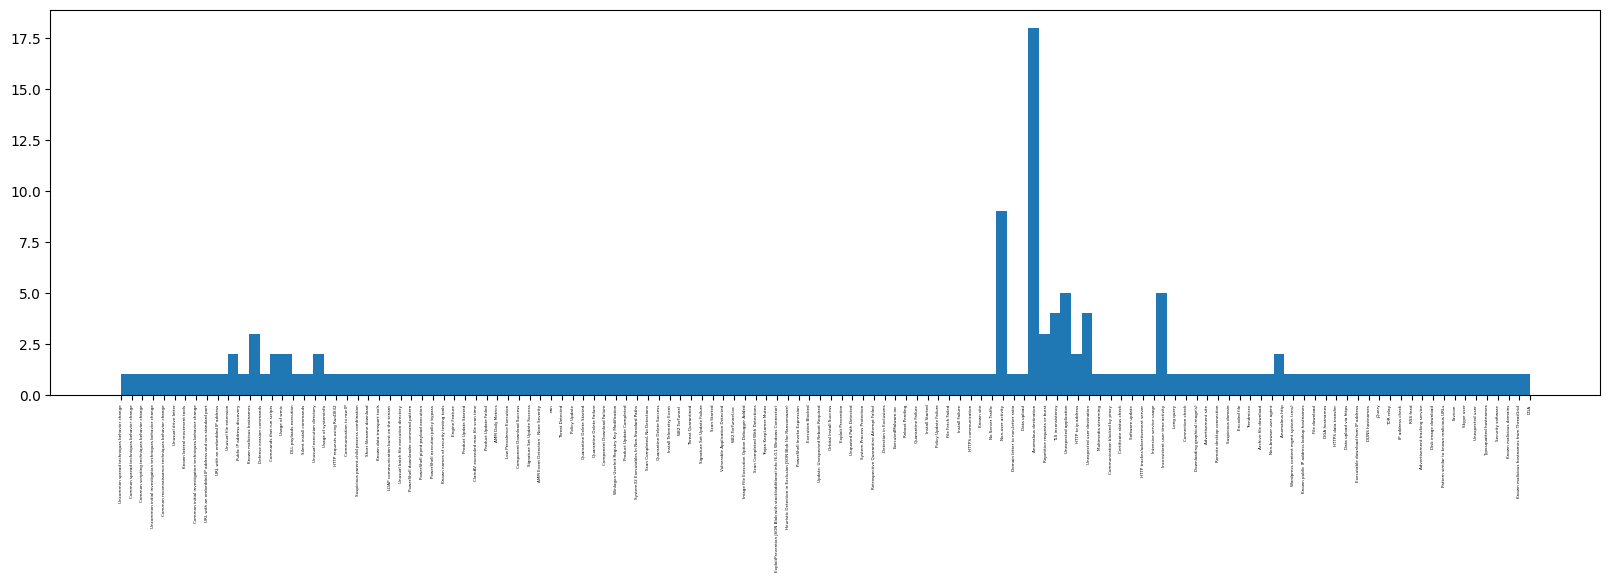

In [95]:
mylist=[key for key, val in countIdforTitle.items() for _ in range(val)]
fig, ax=plt.subplots(figsize=(20,5))
plt.hist(mylist, bins=132)
plt.xticks(fontsize=3, rotation=90)

#plt.bar(countIdforTitle.keys(), countIdforTitle.values(), color='g')
plt.show()

# Part 2
Еhe occurrence number of all the different 'eventsTitles' in the data. 

In [33]:
mainEventTitle = dict(Counter(df['eventTitle']))
#Counter(df['eventTitle'])


# Histogram
The x-axis is the name of the eventTitle.
The y-axis is the occurrences number of eventTitles.

In [49]:
mylist=[key for key, val in mainEventTitle.items() for _ in range(val)]
fig, ax=plt.subplots(figsize=(20,5))
plt.hist(mylist, bins=132)
plt.xticks(fontsize=3, rotation=90)
plt.show()

The average of the number of eventTitles occurrences. 

In [90]:
average=0
for i in mainEventTitle:
    average+=mainEventTitle[i]
average=average/len(mainEventTitle)
print(average)

6721.204545454545


All events that have more than the average occurrence value 

In [91]:
maxx=0
for i in mainEventTitle:
    if mainEventTitle[i]>average:
        print(i, mainEventTitle[i])
        if maxx < mainEventTitle[i]:
            maxx =mainEventTitle[i]
            r=i
print('The main eventTitle is:', r, maxx)

Product Update Started 7151
ClamAV exceeded max file scan time 10770
Product Update Failed 7078
Quarantine Delete Started 16898
Quarantine Delete Success 13649
HTTPS communication 177248
Known site 208838
No Server Traffic 10513
Non-user activity 54927
Domain letter to non‐letter ratio 69767
Data upload 6820
Anomalous destination 132513
TLS inconsistency 13733
Unexpected application 61637
Multimedia streaming 11998
Communication blocked by proxy 17323
Inconsistent user time activity 11221
The main eventTitle is: Known site 208838


# Part 3
Vocabulary with meanings from when we have been observing each eventTitle.

In [3]:
dictionary = df.groupby('eventTitle')['from'].unique().to_dict()
#dictionary=defaultdict(list)
#for i,j in enumerate(df['eventTitle']):
    #if (df.loc[i, 'from']) not in dictionary[j]:
        #dictionary[j].append(df.loc[i, 'from'])

Vocabulary with meanings to when we have been observing each eventTitle.

In [57]:
dictionary2 = df.groupby('eventTitle').to.unique().to_dict()

In [58]:
minus=0
dictionary3=defaultdict(list)
for i in dictionary2:
    for j, jj in enumerate (dictionary2[i]):
        minus=dictionary2[i][j]-dictionary[i][j]
        dictionary3[i].append(minus)

How long did the eventTitles last.

In [60]:
notNullTime =defaultdict(list)
for i in dictionary3:
    if len(dictionary3[i])!=1:
        if(all(x==dictionary3[i][0] for x in dictionary3[i]))==False :
                    notNullTime[i].append(dictionary3[i])
        else:
            if 0 not in dictionary3[i]:
                notNullTime[i].append(dictionary3[i])
    else: 
        if dictionary3[i]!=[0]:
            notNullTime[i].append(dictionary3[i])


Null data :

In [61]:
a= df[df['eventTitle'].isnull()]


,Unnamed: 0,eventId,eventTitle,assetId,sourceId,startDay,from,to
4402,42,NaN,NaN,6ec42d4b-d012-3737-8886-b885ae03636f,endpoint-2,20230119,1674087191000,1674087191000
4441,81,NaN,NaN,b8ed3d07-787c-3fde-acaf-85acd35cb19c,endpoint-2,20230119,1674087956000,1674087956000
4445,85,NaN,NaN,3404e56d-36ba-3dd9-a1ed-9355835fcbf8,endpoint-2,20230119,1674088084000,1674088084000
4509,149,NaN,NaN,3e7b91a8-9321-35c9-ac46-ef5fb59124c4,endpoint-2,20230119,1674088921000,1674088921000
4608,248,NaN,NaN,524c863e-2505-3a14-9610-afadd78013fe,endpoint-2,20230119,1674090776000,1674090776000
...,...,...,...,...,...,...,...,...
804779,5683,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674164100000,1674164400000
821570,441,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674164100000,1674164400000
846528,3347,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674162900000,1674163200000
860988,17807,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674164400000,1674164700000


# Part 4
Which eventTitles relate to which 'sourceId'. We have three in 'sourceId' (endpoint1-1, endpoint-2, network-1).

In [3]:
countSourseId = dict(Counter(df['sourceId']))
Counter(df['sourceId'])

Counter({'endpoint-1': 4360, 'endpoint-2': 76756, 'network-1': 806083})

In [63]:
dictionary4 = df.groupby('eventTitle').sourceId.unique().to_dict()

All events that lasted longer than 0 millisecond were extracted from the network-1.

In [64]:
for i in notNullTime:
    print(i, dictionary4[i])

Advertisement site ['network-1']
Advertisement tracking service ['network-1']
Anomalous destination ['network-1']
Anomalous http ['network-1']
Archive file download ['network-1']
Certificate status check ['network-1']
Communication blocked by proxy ['network-1']
Connection check ['network-1']
DDNS hostnames ['network-1']
DGA ['network-1']
DGA hostnames ['network-1']
Data upload ['network-1']
Data upload via https ['network-1']
Disk image download ['network-1']
Domain letter to non‐letter ratio ['network-1']
Encoded file ['network-1']
Executable download from IP address ['network-1']
Favicon ['network-1']
File download ['network-1']
HTTP to ip address ['network-1']
HTTP tracker/advertisement server ['network-1']
HTTPS communication ['network-1']
HTTPS data transfer ['network-1']
IP address check ['network-1']
Inconsistent user time activity ['network-1']
Intensive service usage ['network-1']
Known malicious domains ['network-1']
Known malicious hostnames ['endpoint-1' 'network-1']
Known

# Part 5
How many different assetIds, and which eventTitles relate to them.

In [3]:
countSourceId = df.groupby('assetId').eventTitle.nunique().to_dict()
#countSourceId

In [4]:
average=0
for i in countSourceId:
    average+=countSourceId[i]
average=average/len(countSourceId)
print(average)

6.317518248175182


In [5]:
maxx=0
for i in countSourceId:
    if countSourceId[i]>average:
        #print(i, countSourceId[i])
        if maxx < countSourceId[i]:
            maxx =countSourceId[i]
            r=i
print('The assetId which have more then average eventTitle is:', r, maxx)

The assetId which have more then average eventTitle is: b8368210-4879-3d5b-8247-2746b956109e 28


In [4]:
oneEncodedVector = df.groupby('assetId').eventTitle.unique().to_dict()
#oneEncodedVector

In [5]:
uniqueAssets = df['assetId'].unique()

In [6]:
uniqueEventTitle = df['eventTitle'].unique()

In [7]:
dicct=defaultdict(list)
for i in uniqueAssets:
    for j in uniqueEventTitle:
        if j in oneEncodedVector[i]: dicct[i].append(1)
        else: dicct[i].append(0)


# Part 6
Prepare a dataset in the form of one-hot-encoded vector for each asset.


In [8]:
dfDicct = pd.DataFrame(dicct)

In [9]:
distance1= pd.DataFrame(dicct).T

A few examples where I show the difference between the appropriate distance measures 

# Euclidean distance

In [17]:
#import itertools
dictDistanceE = defaultdict()
for i, j in itertools.combinations(dfDicct, 2):
    dictDistanceE[i,j] = distance.euclidean(dfDicct[i], dfDicct[j])

In [19]:
max(dictDistance.values())

7.280109889280518

In [20]:
list(dictDistance.keys())[list(dictDistance.values()).index(7.280109889280518)]

('b8368210-4879-3d5b-8247-2746b956109e',
 '6457ed88-d031-3e9d-90b3-7e0432ccff20')

In [21]:
min(dictDistance.values())

0.0

In [22]:
list(dictDistance.keys())[list(dictDistance.values()).index(0.0)]

('80531c37-618b-3066-99a7-d0349fa083ca',
 '04283d5d-f70c-3463-8baf-8adff83053af')

# Manhattan 

In [9]:
import itertools
dictDistanceM = defaultdict()
for i, j in itertools.combinations(dfDicct, 2):
    dictDistanceM[i,j] = distance.cityblock(dfDicct[i], dfDicct[j])
#15 minut

In [10]:
max(dictDistanceM.values())

53

In [11]:
keys_with_value_53 = [key for key, value in dictDistanceM.items() if value == 53]
keys_with_value_53

[('b8368210-4879-3d5b-8247-2746b956109e',
  '6457ed88-d031-3e9d-90b3-7e0432ccff20')]

In [13]:
keys_with_value_50 = [key for key, value in dictDistanceM.items() if value >=50]
keys_with_value_50

[('b8368210-4879-3d5b-8247-2746b956109e',
  '948a3f63-4b7f-3eb5-91b9-159875b0d6a6'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '70fc4e4e-d7ff-3852-a590-0a9467539f1a'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '80b26beb-a1fb-31cb-986c-976093db405c'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'b6c9b26f-774a-3cc2-a997-68034aef94f1'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'd05c4442-0e77-3748-8204-5b4a13e985f0'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '8e954949-9868-39f4-b7e1-4e60026df64b'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'd4a03bb6-c83a-3083-a4f3-889d3eed1143'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'cf2db902-d573-39d7-9804-0d43697bfe29'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '69b4966f-57d8-3b61-9870-ac28808a5847'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '3011e2da-76f2-3db4-9138-e5a000c9dc85'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'c8fb7073-d994-3518-ba6a-41792a88eb04'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '84cc19d2-7ebd-3755-b

# Corr

In [10]:
import seaborn as sns

# Calculate the correlation coefficient between different variables
cor =distance1.corr()
#plt.figure(figsize=(134,130))
#sns.heatmap(cor, annot =True)
#plt.savefig("correlation.png")

In [11]:
# Filter the correlation matrix with only strong correlations
strong_cor = cor[(cor > 0.8) | (cor < -0.8)]
eventTitle_pairs=defaultdict()
eventTitle_numb=[]
for i in strong_cor.columns:
    for j in strong_cor.index:
        if i!=j:
            if (strong_cor[i][j]>=0.8) | (strong_cor[i][j]<=-0.8):
                if (uniqueEventTitle[j], uniqueEventTitle[i]) not in eventTitle_pairs:
                    eventTitle_pairs[(uniqueEventTitle[i],uniqueEventTitle[j])]=strong_cor[i][j]
                    eventTitle_numb.append(j)

In [12]:
sorted_eventTitle_pairs = dict(sorted(eventTitle_pairs.items(), key=lambda x: x[1], reverse=True))
sorted_eventTitle_pairs

{('LDAP communication burst on the tenant',
  'AMM Event Detection - None Severity'): 1.0,
 ('LDAP communication burst on the tenant',
  'Retrospective Quarantine Attempt Failed'): 1.0,
 ('LDAP communication burst on the tenant', 'File Fetch Failed'): 1.0,
 ('Unusual batch file execution directory', 'W32.TorTunnel'): 1.0,
 ('Unusual batch file execution directory', 'W32.TorTunnel.ioc'): 1.0,
 ('PowerShell downloader command pattern',
  'PowerShell piped payload execution'): 1.0,
 ('AMM Event Detection - None Severity',
  'Retrospective Quarantine Attempt Failed'): 1.0,
 ('AMM Event Detection - None Severity', 'File Fetch Failed'): 1.0,
 ('Threat Detected', 'Threat Quarantined'): 1.0,
 ('W32.TorTunnel', 'W32.TorTunnel.ioc'): 1.0,
 ('ExploitPrevention JSON Blob with stack/additional info (6.0.1 Windows Connector)',
  'Exploit Prevention'): 1.0,
 ('Update: Unexpected Reboot Required', 'Reboot Pending'): 1.0,
 ('Retrospective Quarantine Attempt Failed', 'File Fetch Failed'): 1.0,
 ('Execut

In [13]:
# Filter the correlation matrix with only strong correlations
strong_cor = cor[(cor > 0.8) | (cor < -0.8)]
eventTitle_pairs=defaultdict()
eventTitle_numb=[]
for i in strong_cor.columns:
    for j in strong_cor.index:
        if i!=j:
            if (strong_cor[i][j]>=0.8) | (strong_cor[i][j]<=-0.8):
                if (uniqueEventTitle[j], uniqueEventTitle[i]) not in eventTitle_pairs:
                    eventTitle_pairs[(uniqueEventTitle[i],uniqueEventTitle[j])]=strong_cor[i][j]
                    eventTitle_numb.append(j)

In [14]:
eventTitle_numb

[39,
 70,
 77,
 52,
 57,
 28,
 34,
 38,
 80,
 80,
 70,
 77,
 53,
 72,
 74,
 44,
 51,
 55,
 57,
 72,
 74,
 67,
 73,
 77,
 74,
 78,
 80,
 119,
 130]

In [15]:
cor[(cor>=0.8) | (cor<=-0.8)].to_csv('correlation08.csv')

In [16]:

updateDataSet = distance1.drop(eventTitle_numb, axis=1)
updateDataSet.loc[:, :]

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,131
8b65448f-96b2-314a-bd1f-23569a1a6144,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80531c37-618b-3066-99a7-d0349fa083ca,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c18a550f-9172-3de8-a75d-1cb3833ac35a,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3033624b-558c-3dd3-bb03-cbf255c25198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23a4c5b4-20ad-330b-981c-8a0954e75d07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a618da6a-902e-3854-b2cc-a7a4fd16437e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00a7bc31-b8f7-30e5-b22c-b20669a07b9b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6b2f4636-eb56-3158-b3f1-88869bbf7ec0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


for i in eventTitle_pairs:
    if (distance1[i[0]] == distance1[i[1]]).all():
        print(i, 'true')

In [17]:

for i in distance1:
# check if all values in column 'a' are equal to 0
    if (distance1[i] == 0).all():
        print(i, 'All values in column are 0')
    elif (distance1[i]==1).all():
        print(i, 'All values in column are 1')


40 All values in column are 0


strong_cor = cor[(cor > 0.8) | (cor < -0.8)]
eventTitle_pairs=defaultdict()
eventTitle_numb=[]
for i in strong_cor.columns:
    for j in strong_cor.index:
        if i!=j:
            if (strong_cor[i][j]>=0.8) | (strong_cor[i][j]<=-0.8):
                if (j, i) not in eventTitle_pairs:
                    eventTitle_pairs[(i,j)]=strong_cor[i][j]

In [18]:
updateDataSet = updateDataSet.drop(40, axis=1)
updateDataSet

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,131
8b65448f-96b2-314a-bd1f-23569a1a6144,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80531c37-618b-3066-99a7-d0349fa083ca,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c18a550f-9172-3de8-a75d-1cb3833ac35a,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3033624b-558c-3dd3-bb03-cbf255c25198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23a4c5b4-20ad-330b-981c-8a0954e75d07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a618da6a-902e-3854-b2cc-a7a4fd16437e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00a7bc31-b8f7-30e5-b22c-b20669a07b9b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6b2f4636-eb56-3158-b3f1-88869bbf7ec0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Chi-squared test

In [ ]:
 sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, 
                             random_state=None, copy_x=True, algorithm='lloyd')

sklearn.metrics.calinski_harabasz_score(X, labels)

C:\Users\Katya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Katya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Katya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Katya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

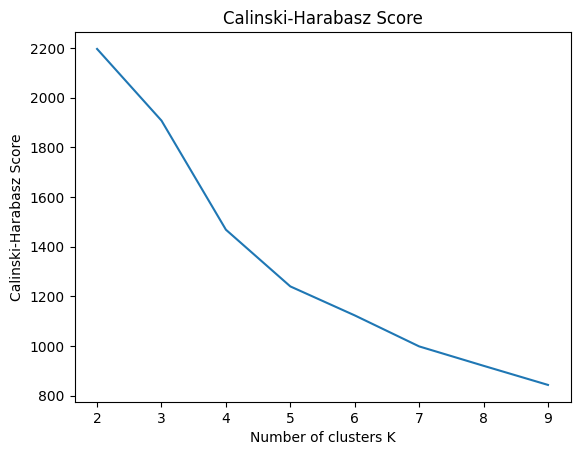

Best value of K = 2


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

#list to store the Calinski-Harabasz scores for different values of K:
ch_scores = []
k_range = range(2, 10)

#Setting a fixed random seed makes your experiments more reproducible and 
#easier to debug, as you can obtain the same results each time you run the algorithm. 
#In this case, the value random_state=1 is used to set the random seed to a specific value (1), 
#but you could set it to any integer value.

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(updateDataSet)
    ch_score = calinski_harabasz_score(updateDataSet, kmeans_model.labels_)
    
    ch_scores.append(ch_score)

plt.plot(k_range, ch_scores)
plt.xlabel('Number of clusters K')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score')
plt.show()
best_k = np.argmax(ch_scores) + 2 # Add 2 because k_range starts from 2
print("Best value of K =", best_k)


volání kmeans.labels_ poskytne pole celých čísel představující přiřazení každého datového bodu ke clusteru ve stejném pořadí jako vstupní data. Například pokud máme 100 datových bodů a K=5, vrátí kmeans.labels_ pole délky 100 s celými čísly od 0 do 4, která udávají, do kterého z 5 clusteru každý datový bod patří

Vyšší skóre znamená, že vzdálenost mezi clustery je větší než vzdálenost uvnitř clusteru, což znamená, že clustery jsou dobře oddělené a odlišné.

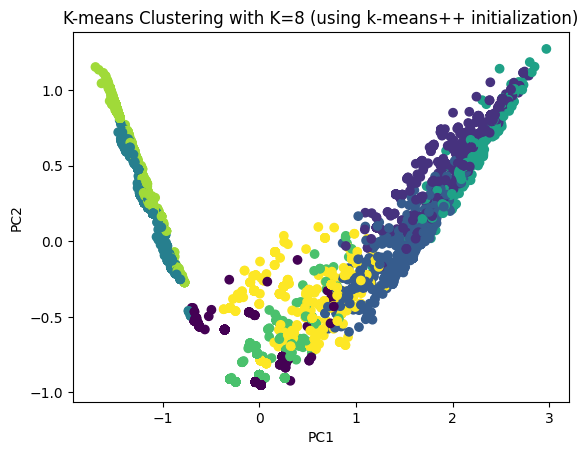

In [64]:
K=2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Fit KMeans clustering using k-means++ initialization and K=8 clusters
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=1).fit(updateDataSet)

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(updateDataSet)

# Plot the data points with different colors representing different clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title('K-means Clustering with K=8 (using k-means++ initialization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig("KMeans.png")
plt.show()

In [66]:
kmeans.labels_

array([3, 3, 6, ..., 5, 0, 0])

In [74]:
from sklearn.metrics import pairwise_distances_argmin_min
xlosest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, updateDataSet)

In [80]:
xlosest

array([2070, 2066, 2357,    5, 2957, 2088,   91, 3089], dtype=int64)

In [81]:
_

array([0.38757709, 0.78971655, 1.05321919, 0.57720672, 1.49694243,
       0.47325146, 0.53739515, 0.80003063])

In [17]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambience', 'Affordability']
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, fill='toself', name='Restaurant 1'),
        go.Scatterpolar(r=restaurant_2, theta=categories, fill='toself', name='Restaurant 2'),
        go.Scatterpolar(r=restaurant_3, theta=categories, fill='toself', name='Restaurant 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Restaurant comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

In [118]:
updateDataSet

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,131,Cluster
8b65448f-96b2-314a-bd1f-23569a1a6144,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
80531c37-618b-3066-99a7-d0349fa083ca,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
c18a550f-9172-3de8-a75d-1cb3833ac35a,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3033624b-558c-3dd3-bb03-cbf255c25198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23a4c5b4-20ad-330b-981c-8a0954e75d07,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
a618da6a-902e-3854-b2cc-a7a4fd16437e,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
00a7bc31-b8f7-30e5-b22c-b20669a07b9b,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
6b2f4636-eb56-3158-b3f1-88869bbf7ec0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [19]:

d={}
j=0
for i in uniqueEventTitle:
    if j not in eventTitle_numb:
        if j!=40:
            d[j]=i
            j+=1
        else: j+=1
    else: j+=1

In [20]:
d

{0: 'Uncommon spread techniques behavior change',
 1: 'Common spread techniques behavior change',
 2: 'Common scripting techniques behavior change',
 3: 'Uncommon initial investigation techniques behavior change',
 4: 'Common reconnaissance techniques behavior change',
 5: 'Unusual drive letter',
 6: 'Known lateral movement tools',
 7: 'Common initial investigation techniques behavior change',
 8: 'URL with an embedded IP address and non-standard port',
 9: 'URL with an embedded IP address',
 10: 'Unusual file extension',
 11: 'Public IP address discovery',
 12: 'Known malicious hostnames',
 13: 'Defense evasion commands',
 14: 'Commands that run scripts',
 15: 'Usage of wmic',
 16: 'DLL payloads execution',
 17: 'Silent install commands',
 18: 'Unusual execution directory',
 19: 'Usage of systeminfo',
 20: 'HTTP requests using RunDll32',
 21: 'Communication to raw IP',
 22: 'Suspicious parent-child process combination',
 23: 'Short filename download',
 24: 'Known data transport tools'

In [26]:
d.values()

dict_values(['Uncommon spread techniques behavior change', 'Common spread techniques behavior change', 'Common scripting techniques behavior change', 'Uncommon initial investigation techniques behavior change', 'Common reconnaissance techniques behavior change', 'Unusual drive letter', 'Known lateral movement tools', 'Common initial investigation techniques behavior change', 'URL with an embedded IP address and non-standard port', 'URL with an embedded IP address', 'Unusual file extension', 'Public IP address discovery', 'Known malicious hostnames', 'Defense evasion commands', 'Commands that run scripts', 'Usage of wmic', 'DLL payloads execution', 'Silent install commands', 'Unusual execution directory', 'Usage of systeminfo', 'HTTP requests using RunDll32', 'Communication to raw IP', 'Suspicious parent-child process combination', 'Short filename download', 'Known data transport tools', 'LDAP communication burst on the tenant', 'Unusual batch file execution directory', 'PowerShell down

In [20]:
import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn.cluster import KMeans

categories = list(d.values())


# Perform K-Means clustering with k=8
kmeans = KMeans(n_clusters=8, init='k-means++', n_init='auto').fit(updateDataSet)

fig = go.Figure()

# Add the data for each cluster
cluster_1 = updateDataSet[kmeans.labels_ == 1].mean()
cluster_2 = updateDataSet[kmeans.labels_ == 2].mean()

#difference_index = cluster_1 != cluster_2

difference_index = abs(cluster_1 - cluster_2) >=0.2

categories = [d[i] for i in list(cluster_1.index[difference_index])]

cluster_1 = list(cluster_1[difference_index])
cluster_2 = list(cluster_2[difference_index])


fig.add_trace(go.Scatterpolar(r=cluster_1, theta=categories, fill='toself', name=f'Cluster 1'))
fig.add_trace(go.Scatterpolar(r=cluster_2, theta=categories, fill='toself', name=f'Cluster 2'))

fig.update_layout(title=go.layout.Title(text='Clusters'),
                  polar={'radialaxis': {'visible': True}},
                  showlegend=True)

pyo.plot(fig)

'temp-plot.html'

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn.cluster import KMeans
from itertools import combinations

categories = list(d.values())

# Perform K-Means clustering with k=8
kmeans = KMeans(n_clusters=8, init='k-means++', n_init='auto').fit(updateDataSet)

p = combinations(range(8), 2)

fig = make_subplots(rows=1, cols=2)

cluster_a = updateDataSet[kmeans.labels_ == 2].mean()
cluster_b = updateDataSet[kmeans.labels_ == 3].mean()

difference_index = abs(cluster_a - cluster_b) >= 0.2
    
categories_diff = [d[i] for i in list(cluster_a.index[difference_index])]
    
cluster_a_diff = list(cluster_a[difference_index])
cluster_b_diff = list(cluster_b[difference_index])

fig.add_trace(go.Scatterpolar(r=cluster_a_diff, theta=categories_diff, fill='toself', name=f'Cluster 2'), row=1, col=1)
fig.add_trace(go.Scatterpolar(r=cluster_b_diff, theta=categories_diff, fill='toself', name=f'Cluster 3'), row=1, col=2)

# for i, (a, b) in enumerate(p):
    
#     cluster_a = updateDataSet[kmeans.labels_ == a].mean()
#     cluster_b = updateDataSet[kmeans.labels_ == b].mean()

#     difference_index = abs(cluster_a - cluster_b) >= 0.2
    
#     categories_diff = [d[i] for i in list(cluster_a.index[difference_index])]
    
#     cluster_a_diff = list(cluster_a[difference_index])
#     cluster_b_diff = list(cluster_b[difference_index])

#     row = (i - 1) // 3 + 1
#     col = (i - 1) % 3 + 1

#     print(row, col)
#     fig.add_trace(go.Scatterpolar(r=cluster_a_diff, theta=categories_diff, fill='toself', name=f'Cluster {a}'), row=row, col=col)
#     fig.add_trace(go.Scatterpolar(r=cluster_b_diff, theta=categories_diff, fill='toself', name=f'Cluster {b}'), row=row, col=col)

fig.update_layout(title=go.layout.Title(text='Clusters'),
                 polar={'radialaxis': {'visible': True}},
                 showlegend=True)

pyo.plot(fig)


ValueError: Trace type 'scatterpolar' is not compatible with subplot type 'xy'
at grid position (1, 1)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

In [59]:
from itertools import combinations
nums = [1,2,3,4,5,6,7,8]
p=combinations(nums, 2)
for i, (a, b) in enumerate(p): print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [51]:
a, b =t[0]
a


1

In [63]:
kmeans.labels_

array([2, 4, 3, ..., 1, 1, 1])

In [65]:
xlosest

array([3098, 2503, 1205,  898,  969, 2778, 2067, 2066], dtype=int64)

Cluster 1 outliers: []
Cluster 2 outliers: ['b8368210-4879-3d5b-8247-2746b956109e', 'e7e4fb76-8098-357c-94f6-a3886bde11ad', '2ef3dd2b-15ca-3f98-aef2-5f08bd806544', '06703228-8764-3ead-9143-9d206428dc46', 'df5aa175-304a-383f-9efe-0782e1f42e54', '5720ddd0-d70f-3d92-8a36-6b3b7f030f2b']
Cluster 3 outliers: ['524c863e-2505-3a14-9610-afadd78013fe', '59dd78e4-2142-3785-a162-7cd026b7d736']
Cluster 4 outliers: ['28a75664-f736-3114-bf83-3ad69eac3c7b', '92708fe2-3b57-39eb-bdcc-37fbe02e8868', '948a3f63-4b7f-3eb5-91b9-159875b0d6a6', '70fc4e4e-d7ff-3852-a590-0a9467539f1a', '80b26beb-a1fb-31cb-986c-976093db405c', 'b6c9b26f-774a-3cc2-a997-68034aef94f1', 'd05c4442-0e77-3748-8204-5b4a13e985f0', 'cefebf1a-a4e7-3398-a0ae-0015eba153d9', '8e954949-9868-39f4-b7e1-4e60026df64b', 'b7771c14-b84d-32ce-882d-5db5e56cc131', 'd4a03bb6-c83a-3083-a4f3-889d3eed1143', '8e198650-f60e-31e3-b5d5-1d6ab31336ea', 'e5c8f341-4372-33dc-b394-72e96d9418c4', 'a2401a8d-e1f5-3fc4-96fe-143c35e62c52', 'cf2db902-d573-39d7-9804-0d43697bf

In [67]:
dd

{1: ['53d1c8c1-9750-3619-858a-52b6f1c85b69',
  '28a75664-f736-3114-bf83-3ad69eac3c7b',
  '29fbe195-30b5-306b-914b-4dd068409fac',
  '70fc4e4e-d7ff-3852-a590-0a9467539f1a',
  '80b26beb-a1fb-31cb-986c-976093db405c',
  'b6c9b26f-774a-3cc2-a997-68034aef94f1',
  'b305a415-f931-3e1d-bf43-fd3d33279a51',
  '60ea49ab-6179-323b-8b4f-928f79f07acd',
  'cefebf1a-a4e7-3398-a0ae-0015eba153d9',
  '8e954949-9868-39f4-b7e1-4e60026df64b',
  '7273a920-57b7-3ce1-b91e-a52cb3c668ac',
  'b7771c14-b84d-32ce-882d-5db5e56cc131',
  'e9fc62d0-6f0c-3387-97f8-cbd99e3e9793',
  '8e198650-f60e-31e3-b5d5-1d6ab31336ea',
  'a2401a8d-e1f5-3fc4-96fe-143c35e62c52',
  'ead2e8dd-0e8c-30ab-8aa6-df364e9dbec9',
  'cf2db902-d573-39d7-9804-0d43697bfe29',
  'dc43239a-7cae-3c81-91d9-23d568b4d1b8',
  '6a38916f-e3ac-3630-b02a-69b5ea423416',
  '59852b0e-a279-310c-a24a-af63a9e30c2d',
  'd4768da0-4c5d-333a-9606-da606189fe41',
  '0745e0ec-d850-3b51-88cc-0286f2dd0c49',
  '78a03ac2-2f90-32d6-89cc-621dd3f6da23',
  '69b4966f-57d8-3b61-9870-ac28

In [68]:
KKK={}
for i in dd:
    for j in dd[i]:
        if j in oneEncodedVector:
            print(i, oneEncodedVector[j])
            if i in KKK: KKK[i].append(oneEncodedVector[j])
            else: KKK[i]=[oneEncodedVector[j]]
        

1 ['HTTPS communication' 'Anomalous destination' 'Non-user activity'
 'Known site' 'TLS inconsistency' 'Unexpected application'
 'Unexpected user destination' 'No Server Traffic' 'jQuery'
 'Communication blocked by proxy' 'Advertisement site'
 'Domain letter to non‐letter ratio' 'Data upload'
 'HTTP tracker/advertisement server' 'Long query'
 'Certificate status check' 'Encoded file'
 'Downloading graphical image(s)' 'Multimedia streaming']
1 ['No Server Traffic' 'HTTPS communication' 'Anomalous destination'
 'Known site' 'Unexpected user destination' 'TLS inconsistency'
 'Unexpected application' 'Non-user activity'
 'Domain letter to non‐letter ratio' 'Wordpress content mgmt system (cms)'
 'Communication blocked by proxy' 'HTTP tracker/advertisement server'
 'Long query' 'Inconsistent user time activity'
 'Downloading graphical image(s)' 'Advertisement site' 'jQuery'
 'Archive file download' 'Repetitive requests or burst'
 'Certificate status check' 'Data upload']
1 ['Known site' 'Ano

In [30]:
a=updateDataSet.T
import itertools
dictDistanceM = defaultdict()
for i, j in itertools.combinations(a, 2):
    dictDistanceM[i,j] = distance.cityblock(a[i], a[j])

In [32]:
max(dictDistanceM.values())

44

In [33]:
keys_with_value_44 = [key for key, value in dictDistanceM.items() if value == 44]
keys_with_value_44

[('b8368210-4879-3d5b-8247-2746b956109e',
  '948a3f63-4b7f-3eb5-91b9-159875b0d6a6'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '6457ed88-d031-3e9d-90b3-7e0432ccff20')]

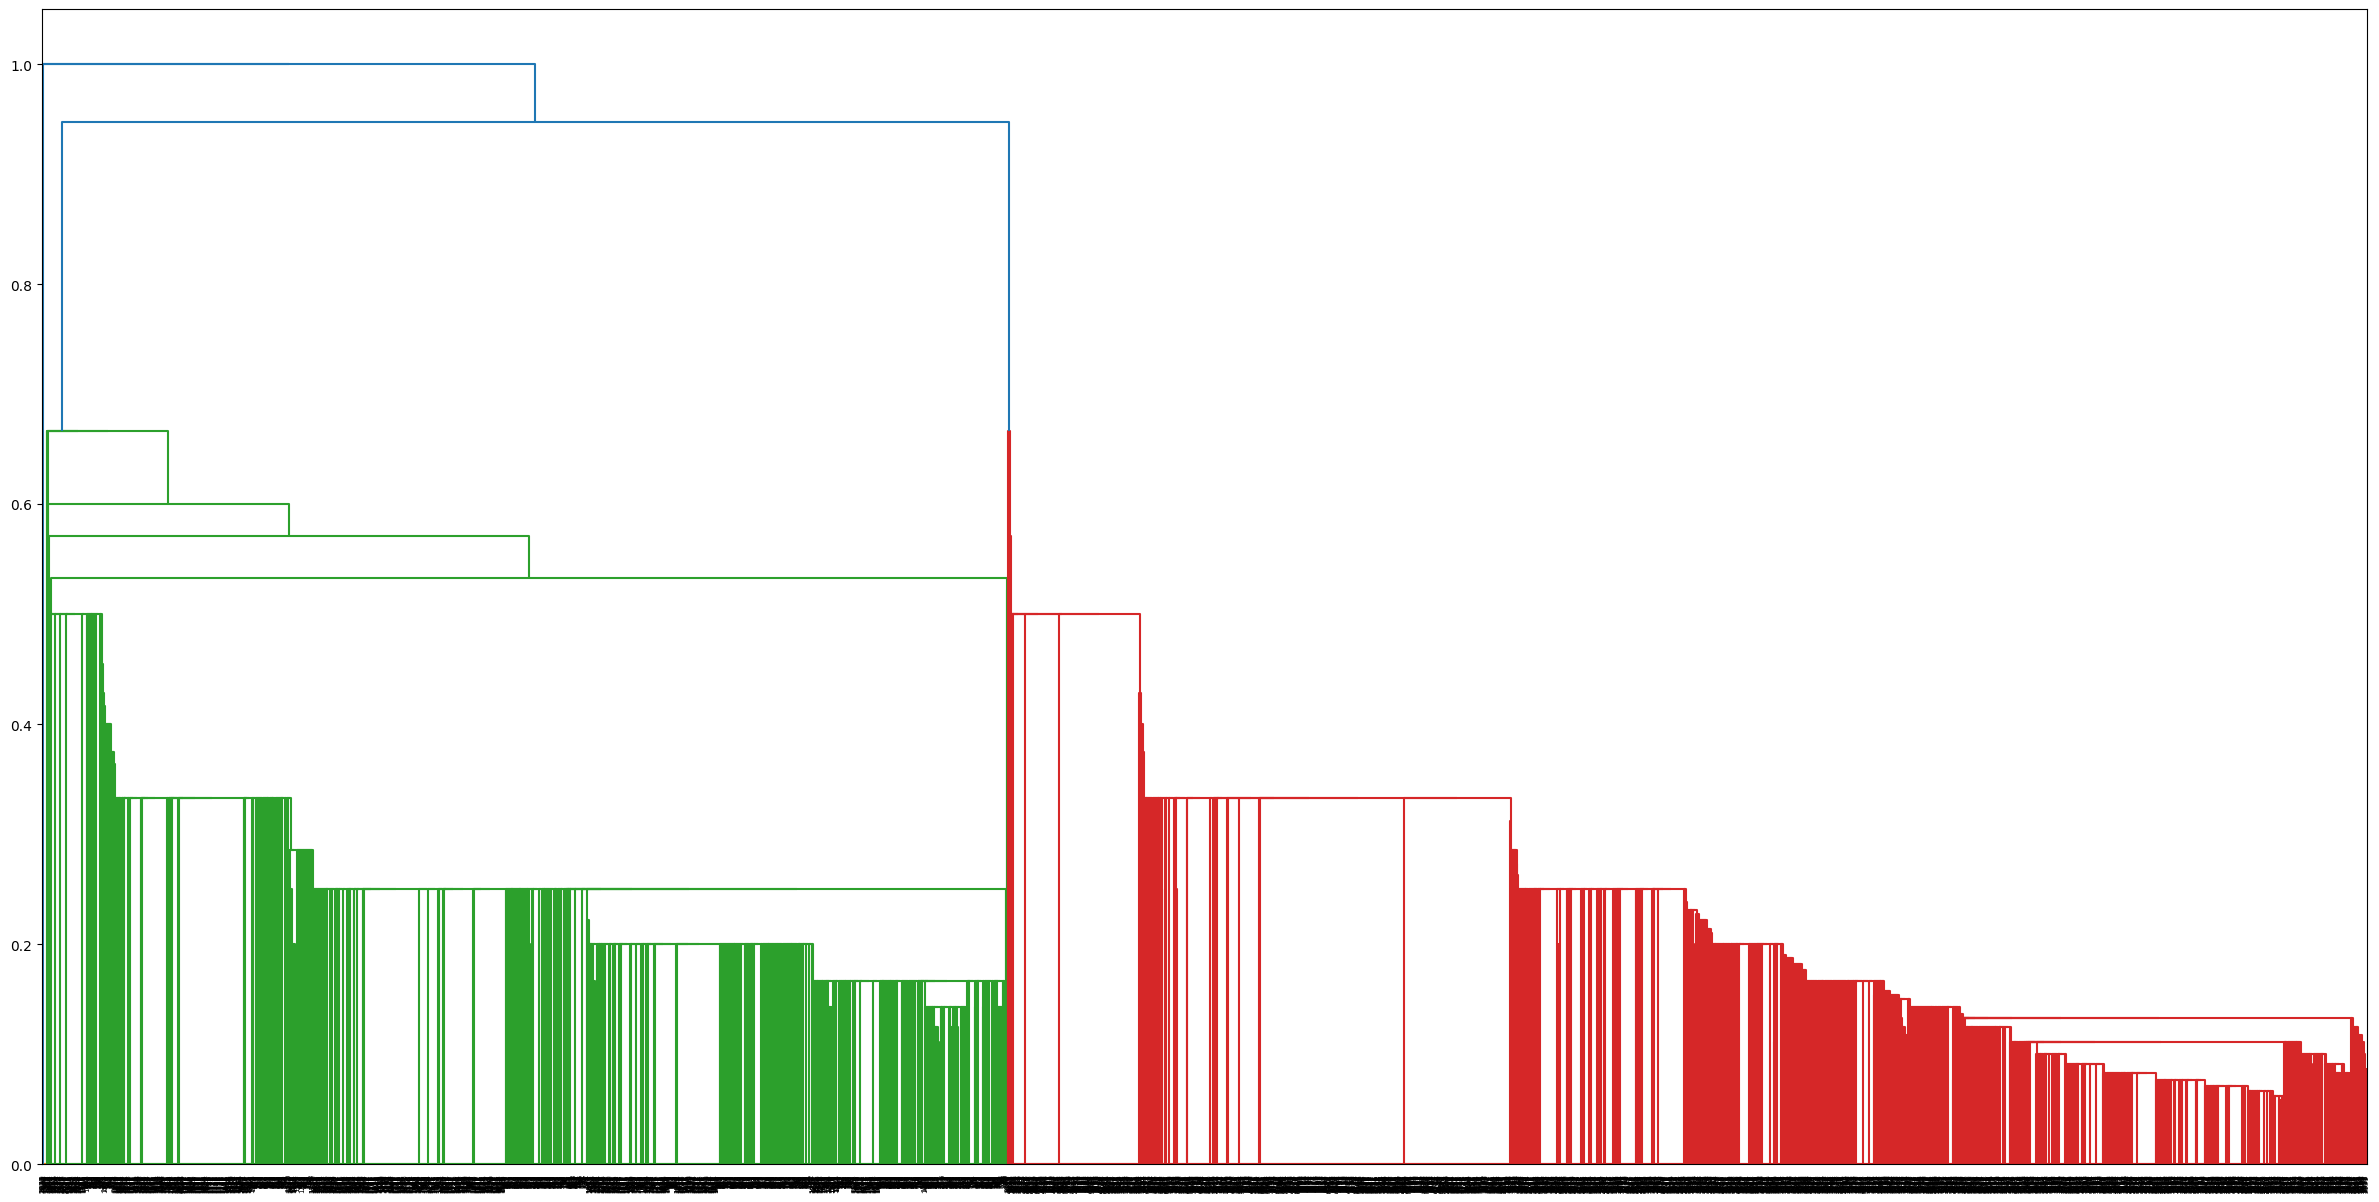

In [23]:
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# assume your dataframe is called `df`
# compute the pairwise distances between rows using Jaccard distance
dists = pdist(updateDataSet, metric='jaccard')

# perform single linkage clustering
linkage_matrix = linkage(dists, method='single')

# plot the dendrogram
plt.figure(figsize=(30,15))
dendrogram(linkage_matrix)
plt.show()
#fig.update_layout(width=800, height=500)


# extract the cluster labels for a given distance threshold
threshold = 0.5 # adjust this value to obtain different number of clusters
clusters = fcluster(linkage_matrix, threshold, criterion='distance')


In [46]:
import plotly.graph_objects as go
import plotly.offline as pyo
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute the pairwise distances between rows using Jaccard distance
dists = pdist(updateDataSet, metric='jaccard')

# Perform hierarchical clustering using single linkage
linkage_matrix = linkage(dists, method='single')

# Extract the cluster labels for a given distance threshold
threshold = 0.3  # Adjust this value to obtain different number of clusters
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Create a dictionary to store the cluster data
cluster_data = {}

# Compute the mean values for each cluster
for cluster_label in range(1, max(clusters) + 1):
    cluster_data[cluster_label] = updateDataSet[clusters == cluster_label].mean()

# Prepare data for polar plot
categories = list(d.values())
difference_index = abs(cluster_data[1] - cluster_data[2]) >= 0.1
categories = [d[i] for i in list(cluster_data[1].index[difference_index])]
cluster_1 = list(cluster_data[1][difference_index])
cluster_2 = list(cluster_data[2][difference_index])

# Create the polar plot
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=cluster_1, theta=categories, fill='toself', name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=cluster_2, theta=categories, fill='toself', name='Cluster 2'))

fig.update_layout(title=go.layout.Title(text='Clusters'),
                  polar={'radialaxis': {'visible': True}},
                  showlegend=True)

# Display the polar plot
pyo.plot(fig)


'temp-plot.html'

In [47]:
np.unique(clusters, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178